### Загружаем библиотеки

In [1]:
from openpyxl import load_workbook
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Embedding, Reshape
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
import warnings

In [2]:
warnings.filterwarnings("ignore")

In [3]:
book = load_workbook(r'C:\Users\Lenovo\OneDrive\Рабочий стол\V7RS41at_12.05.2014ТЗЧ_или_СС.xlsx')
sheet = book.active
classes = []

for row in range(2,  sheet.max_row):
    red_cell_in_row_ones= False
    red_cell_in_row = False

    for column in range(1, sheet.max_column):
        cell = sheet[row][column]
        row_value = row - 1
        while cell.value is None:
            cell = sheet[row_value][column]
            row_value -= 1
        if cell.font.color.value == 'FFFF0000' and red_cell_in_row_ones == True:
            red_cell_in_row = True
            break
        elif cell.font.color.value == 'FFFF0000':
            red_cell_in_row_ones = True

    if red_cell_in_row:
        if classes[-1] == 0:
            classes.append(2)
        elif classes[-1] == 1:
            classes.append(1)
        elif classes[-3:] == [2, 2, 2]:
            classes = classes[:-3] + [1, 1, 1, 1]
        elif classes[-1] == 2:
            classes.append(2)
    else:
        classes.append(0)

sheet[f'DX1'].value = 'Class'
for i in range(len(classes)):
    sheet[f'DX{i+2}'].value = classes[i]

book.save(r'C:\Users\Lenovo\OneDrive\Рабочий стол\V7RS41at_12.05.2014ТЗЧ_или_СС.xlsx')

print(classes)

[0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

### Считываем данные

In [5]:
data = pd.read_excel(r'C:\Users\Lenovo\OneDrive\Рабочий стол\V7RS41at_12.05.2014ТЗЧ_или_СС.xlsx')
data

,Unnamed: 0,"Ubs,V","Ibs,A","Isun,A","RKPT,b","Sst0x,b","Sst1x,b","Ipt0,A","Ipt1,A","Ipt2,A",...,"SPrm2,V","VP,d","ShKom,d","Kmnd,d","God,h","Mes,h","Den,h","Chas,h","Min,h",Sec
0,2014-05-12 00:00:10,14.37,0.27,0.00,1000000.0,110.0,0.0,0.0,0.07,0.07,...,0.98,0.0,134.0,2020.0,14,5,12,0,0,10
1,2014-05-12 00:01:10,14.37,0.21,0.00,1000000.0,110.0,0.0,0.0,0.07,0.07,...,0.96,0.0,134.0,2020.0,14,5,12,0,1,10
2,2014-05-12 00:02:10,14.37,0.21,0.00,1000000.0,110.0,0.0,0.0,0.04,0.07,...,0.99,0.0,134.0,2020.0,14,5,12,0,2,10
3,2014-05-12 00:03:10,14.37,0.24,0.00,1000000.0,110.0,0.0,0.0,0.07,0.09,...,0.98,0.0,134.0,2020.0,14,5,12,0,3,10
4,2014-05-12 00:04:10,14.37,0.21,0.00,1000000.0,110.0,0.0,0.0,0.07,0.07,...,0.99,0.0,134.0,2020.0,14,5,12,0,4,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,2014-05-12 23:55:49,14.69,0.27,0.03,1000000.0,110.0,0.0,0.0,0.09,0.07,...,0.99,0.0,180.0,2010.0,14,5,12,23,55,49
1436,2014-05-12 23:56:50,14.76,0.19,0.51,1000000.0,110.0,0.0,0.0,0.07,0.07,...,0.96,0.0,180.0,2010.0,14,5,12,23,56,50
1437,2014-05-12 23:57:50,14.76,0.24,0.93,1000000.0,110.0,0.0,0.0,0.09,0.09,...,0.99,0.0,180.0,2010.0,14,5,12,23,57,50
1438,2014-05-12 23:58:50,14.76,0.21,0.85,1000000.0,110.0,0.0,0.0,0.07,0.07,...,0.96,0.0,180.0,2010.0,14,5,12,23,58,50


### Удалим столбцы

In [6]:
columns_to_delete = ['RKPT,b','Sst0x,b','Sst1x,b','Ipt0,A', 'Mag0F', 'Mag10', 'Mag11', 'Mag12', 'Mag13',
                   'Mag14','Mag15','Mag16','Isp1,A','Isp2,A','Isp3,A','Isp4,A','Isp5,A','Isp6,A','Isp7,A',
                   'Isp8,A','Mag07','Mag08','Mag09','Mag0A','Mag0B','Mag0C','Mag0D','Mag0E','Mag03','Mag04',
                   'Mag05','Mag06','TDS11,C','TDS12,C','TDS14,C','TDS15,C','TDS17,C','TDS18,C','TDS20,C',
                   'TDS21,C','TDS23,C','iTMO,s','iTMD,s','U-chCAN', 'SSoTR,b','STDS12,b','STDS34,b','res0',
                   'U-MAG,o','U-KPT1,o','U-KPT2,o','U-InfGBV','U-GBV,o','U-InfNAP','TmUpr,b','RKwit,b','Rmorz,b',
                   'IntK_TM', 'RPrd1,b','RPrm1,b','RPrd2,b','RPrm2,b','FPrd1,V','RPrd1,V','FPrd2,V','RPrd2,V','SPrm1,V',
                   'SPrm2,V','VP,d','ShKom,d','Kmnd,d','God,h','Mes,h','Den,h','Chas,h', 'Min,h', 'Sec']
cleared_data = data.copy()
cleared_data.drop(data.columns[[0]], axis=1, inplace=True)
for column in columns_to_delete:
    cleared_data.drop(columns=[column], axis= 1, inplace=True)
cleared_data

,"Ubs,V","Ibs,A","Isun,A","Ipt1,A","Ipt2,A","Ipt3,A","Ipt4,A","Ipt5,A","Ipt6,A","Ipt7,A",...,"TDS6,C","TDS7,C","TDS8,C","TDS9,C","TKpt,C","TGbv,C","TNap,C","TPrd2,C","TPrd1,C","TDS24,C"
0,14.37,0.27,0.00,0.07,0.07,0.0,0.0,0.0,0.0,0.0,...,20.0,22.0,22.0,22.0,27.0,22.0,22.0,23.0,23.0,23.0
1,14.37,0.21,0.00,0.07,0.07,0.0,0.0,0.0,0.0,0.0,...,20.0,22.0,22.0,22.0,27.0,22.0,22.0,23.0,23.0,23.0
2,14.37,0.21,0.00,0.04,0.07,0.0,0.0,0.0,0.0,0.0,...,20.0,22.0,22.0,22.0,27.0,22.0,22.0,23.0,23.0,23.0
3,14.37,0.24,0.00,0.07,0.09,0.0,0.0,0.0,0.0,0.0,...,20.0,22.0,22.0,22.0,27.0,22.0,22.0,23.0,23.0,23.0
4,14.37,0.21,0.00,0.07,0.07,0.0,0.0,0.0,0.0,0.0,...,20.0,21.0,22.0,21.0,27.0,22.0,22.0,23.0,23.0,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,14.69,0.27,0.03,0.09,0.07,0.0,0.0,0.0,0.0,0.0,...,21.0,21.0,21.0,20.0,27.0,20.0,19.0,21.0,21.0,23.0
1436,14.76,0.19,0.51,0.07,0.07,0.0,0.0,0.0,0.0,0.0,...,21.0,21.0,21.0,21.0,27.0,20.0,19.0,21.0,21.0,23.0
1437,14.76,0.24,0.93,0.09,0.09,0.0,0.0,0.0,0.0,0.0,...,21.0,21.0,21.0,21.0,27.0,20.0,20.0,21.0,21.0,23.0
1438,14.76,0.21,0.85,0.07,0.07,0.0,0.0,0.0,0.0,0.0,...,21.0,21.0,21.0,21.0,27.0,20.0,20.0,21.0,21.0,23.0


### Заполним NaN предыдущими значениями

In [7]:
data_filled = cleared_data.copy()
data_filled = data_filled.fillna(method='ffill')
data_filled

,"Ubs,V","Ibs,A","Isun,A","Ipt1,A","Ipt2,A","Ipt3,A","Ipt4,A","Ipt5,A","Ipt6,A","Ipt7,A",...,"TDS6,C","TDS7,C","TDS8,C","TDS9,C","TKpt,C","TGbv,C","TNap,C","TPrd2,C","TPrd1,C","TDS24,C"
0,14.37,0.27,0.00,0.07,0.07,0.0,0.0,0.0,0.0,0.0,...,20.0,22.0,22.0,22.0,27.0,22.0,22.0,23.0,23.0,23.0
1,14.37,0.21,0.00,0.07,0.07,0.0,0.0,0.0,0.0,0.0,...,20.0,22.0,22.0,22.0,27.0,22.0,22.0,23.0,23.0,23.0
2,14.37,0.21,0.00,0.04,0.07,0.0,0.0,0.0,0.0,0.0,...,20.0,22.0,22.0,22.0,27.0,22.0,22.0,23.0,23.0,23.0
3,14.37,0.24,0.00,0.07,0.09,0.0,0.0,0.0,0.0,0.0,...,20.0,22.0,22.0,22.0,27.0,22.0,22.0,23.0,23.0,23.0
4,14.37,0.21,0.00,0.07,0.07,0.0,0.0,0.0,0.0,0.0,...,20.0,21.0,22.0,21.0,27.0,22.0,22.0,23.0,23.0,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,14.69,0.27,0.03,0.09,0.07,0.0,0.0,0.0,0.0,0.0,...,21.0,21.0,21.0,20.0,27.0,20.0,19.0,21.0,21.0,23.0
1436,14.76,0.19,0.51,0.07,0.07,0.0,0.0,0.0,0.0,0.0,...,21.0,21.0,21.0,21.0,27.0,20.0,19.0,21.0,21.0,23.0
1437,14.76,0.24,0.93,0.09,0.09,0.0,0.0,0.0,0.0,0.0,...,21.0,21.0,21.0,21.0,27.0,20.0,20.0,21.0,21.0,23.0
1438,14.76,0.21,0.85,0.07,0.07,0.0,0.0,0.0,0.0,0.0,...,21.0,21.0,21.0,21.0,27.0,20.0,20.0,21.0,21.0,23.0


### Преобразуем данные (min-max масштабирование по варианту)

In [8]:
scaler = MinMaxScaler(feature_range=(0, 1))
rescaled_data = pd.DataFrame(scaler.fit_transform(data_filled))
rescaled_data

,0,1,2,3,4,5,6,7,8,9,...,39,40,41,42,43,44,45,46,47,48
0,0.900952,0.034934,0.000000,0.021277,0.014374,0.0,0.0,0.0,0.0,0.0,...,0.637555,0.735294,0.666667,0.666667,0.704545,0.993377,0.655022,0.740196,0.579399,0.538922
1,0.900952,0.021834,0.000000,0.021277,0.014374,0.0,0.0,0.0,0.0,0.0,...,0.637555,0.735294,0.666667,0.666667,0.704545,0.993377,0.655022,0.740196,0.579399,0.538922
2,0.900952,0.021834,0.000000,0.012158,0.014374,0.0,0.0,0.0,0.0,0.0,...,0.637555,0.735294,0.666667,0.666667,0.704545,0.993377,0.655022,0.740196,0.579399,0.538922
3,0.900952,0.028384,0.000000,0.021277,0.018480,0.0,0.0,0.0,0.0,0.0,...,0.637555,0.735294,0.666667,0.666667,0.704545,0.993377,0.655022,0.740196,0.579399,0.538922
4,0.900952,0.021834,0.000000,0.021277,0.014374,0.0,0.0,0.0,0.0,0.0,...,0.637555,0.730392,0.666667,0.662222,0.704545,0.993377,0.655022,0.740196,0.579399,0.538922
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,0.961905,0.034934,0.005629,0.027356,0.014374,0.0,0.0,0.0,0.0,0.0,...,0.641921,0.730392,0.662222,0.657778,0.704545,0.980132,0.641921,0.730392,0.570815,0.538922
1436,0.975238,0.017467,0.095685,0.021277,0.014374,0.0,0.0,0.0,0.0,0.0,...,0.641921,0.730392,0.662222,0.662222,0.704545,0.980132,0.641921,0.730392,0.570815,0.538922
1437,0.975238,0.028384,0.174484,0.027356,0.018480,0.0,0.0,0.0,0.0,0.0,...,0.641921,0.730392,0.662222,0.662222,0.704545,0.980132,0.646288,0.730392,0.570815,0.538922
1438,0.975238,0.021834,0.159475,0.021277,0.014374,0.0,0.0,0.0,0.0,0.0,...,0.641921,0.730392,0.662222,0.662222,0.704545,0.980132,0.646288,0.730392,0.570815,0.538922


### присоединим столбец классов

In [9]:
rescaled_data_with_classes = rescaled_data.copy()
data_with_classes = data_filled.copy()

rescaled_data_with_classes.insert(loc = rescaled_data_with_classes.shape[1], column = 'Class', value = classes)
data_with_classes.insert(loc = data_with_classes.shape[1], column = 'Class', value = classes)
data_with_classes

,"Ubs,V","Ibs,A","Isun,A","Ipt1,A","Ipt2,A","Ipt3,A","Ipt4,A","Ipt5,A","Ipt6,A","Ipt7,A",...,"TDS7,C","TDS8,C","TDS9,C","TKpt,C","TGbv,C","TNap,C","TPrd2,C","TPrd1,C","TDS24,C",Class
0,14.37,0.27,0.00,0.07,0.07,0.0,0.0,0.0,0.0,0.0,...,22.0,22.0,22.0,27.0,22.0,22.0,23.0,23.0,23.0,0
1,14.37,0.21,0.00,0.07,0.07,0.0,0.0,0.0,0.0,0.0,...,22.0,22.0,22.0,27.0,22.0,22.0,23.0,23.0,23.0,0
2,14.37,0.21,0.00,0.04,0.07,0.0,0.0,0.0,0.0,0.0,...,22.0,22.0,22.0,27.0,22.0,22.0,23.0,23.0,23.0,0
3,14.37,0.24,0.00,0.07,0.09,0.0,0.0,0.0,0.0,0.0,...,22.0,22.0,22.0,27.0,22.0,22.0,23.0,23.0,23.0,0
4,14.37,0.21,0.00,0.07,0.07,0.0,0.0,0.0,0.0,0.0,...,21.0,22.0,21.0,27.0,22.0,22.0,23.0,23.0,23.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,14.69,0.27,0.03,0.09,0.07,0.0,0.0,0.0,0.0,0.0,...,21.0,21.0,20.0,27.0,20.0,19.0,21.0,21.0,23.0,0
1436,14.76,0.19,0.51,0.07,0.07,0.0,0.0,0.0,0.0,0.0,...,21.0,21.0,21.0,27.0,20.0,19.0,21.0,21.0,23.0,0
1437,14.76,0.24,0.93,0.09,0.09,0.0,0.0,0.0,0.0,0.0,...,21.0,21.0,21.0,27.0,20.0,20.0,21.0,21.0,23.0,0
1438,14.76,0.21,0.85,0.07,0.07,0.0,0.0,0.0,0.0,0.0,...,21.0,21.0,21.0,27.0,20.0,20.0,21.0,21.0,23.0,0


### Проверим, все ли ячейки заполнились

In [10]:
data_with_classes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1440 entries, 0 to 1439
Data columns (total 50 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ubs,V    1440 non-null   float64
 1   Ibs,A    1440 non-null   float64
 2   Isun,A   1440 non-null   float64
 3   Ipt1,A   1440 non-null   float64
 4   Ipt2,A   1440 non-null   float64
 5   Ipt3,A   1440 non-null   float64
 6   Ipt4,A   1440 non-null   float64
 7   Ipt5,A   1440 non-null   float64
 8   Ipt6,A   1440 non-null   float64
 9   Ipt7,A   1440 non-null   float64
 10  Ipt10,A  1440 non-null   float64
 11  Ipt11,A  1440 non-null   float64
 12  Ipt12,A  1440 non-null   float64
 13  Ipt13,A  1440 non-null   float64
 14  Ipt14,A  1440 non-null   float64
 15  Ipt15,A  1440 non-null   float64
 16  Ipt16,A  1440 non-null   float64
 17  Ipt17,A  1440 non-null   float64
 18  TR1,C    1440 non-null   float64
 19  TR2,C    1440 non-null   float64
 20  TR3,C    1440 non-null   float64
 21  TR4,C    1440 

### Посмотрим на количество элементов, принадлежащих каждому классу

In [11]:
class_counts = data_with_classes['Class'].value_counts()
class_counts

0    1217
1     160
2      63
Name: Class, dtype: int64

### Разделим наборы на обучающую и тестовую выборки

In [12]:
test_size = 0.2
seed = 7

# ИСХОДНЫЙ
data_X = data_with_classes.iloc[:, :-1]
data_Y = data_with_classes['Class']

data_X_train, data_X_test, data_Y_train, data_Y_test = train_test_split(data_X, data_Y, test_size=test_size, random_state=seed)


# ПРЕОБРАЗОВАННЫЙ
rescaled_data_X = rescaled_data_with_classes.iloc[:, :-1]
rescaled_data_Y = rescaled_data_with_classes['Class']

rescaled_data_X_train, rescaled_data_X_test, rescaled_data_Y_train, rescaled_data_Y_test = train_test_split(rescaled_data_X, rescaled_data_Y, test_size=test_size, random_state=seed)


datasets = [{'X_train': data_X_train, 'X_test': data_X_test,
             'Y_train': data_Y_train, 'Y_test': data_Y_test,
             'name': 'original_data'},
            {'X_train': rescaled_data_X_train, 'X_test': rescaled_data_X_test,
             'Y_train': rescaled_data_Y_train, 'Y_test': rescaled_data_Y_test,
             'name': 'original_rescaled_data'}]


# GRU на исходном наборе

Epoch 1/15
35/35 [==============================] - 12s 152ms/step - loss: 0.5324 - accuracy: 0.8156 - val_loss: 0.1911 - val_accuracy: 0.9569
Epoch 2/15
35/35 [==============================] - 3s 80ms/step - loss: 0.2748 - accuracy: 0.9208 - val_loss: 0.1253 - val_accuracy: 0.9741
Epoch 3/15
35/35 [==============================] - 3s 79ms/step - loss: 0.2421 - accuracy: 0.9247 - val_loss: 0.0992 - val_accuracy: 0.9741
Epoch 4/15
35/35 [==============================] - 3s 83ms/step - loss: 0.2172 - accuracy: 0.9305 - val_loss: 0.0819 - val_accuracy: 0.9828
Epoch 5/15
35/35 [==============================] - 3s 81ms/step - loss: 0.1877 - accuracy: 0.9363 - val_loss: 0.0648 - val_accuracy: 0.9828
Epoch 6/15
35/35 [==============================] - 3s 79ms/step - loss: 0.1846 - accuracy: 0.9373 - val_loss: 0.0572 - val_accuracy: 0.9914
Epoch 7/15
35/35 [==============================] - 3s 80ms/step - loss: 0.1828 - accuracy: 0.9382 - val_loss: 0.0506 - val_accuracy: 0.9914
Epoch 8/15


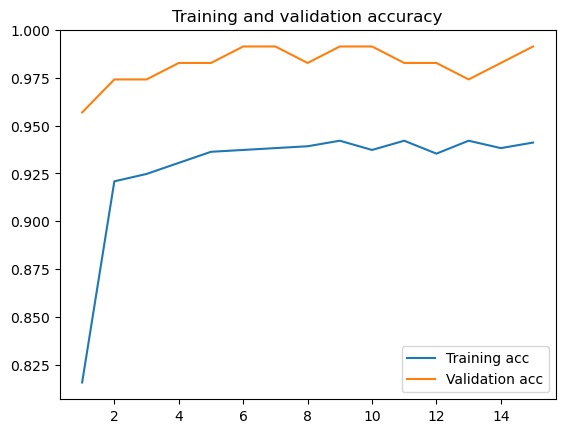

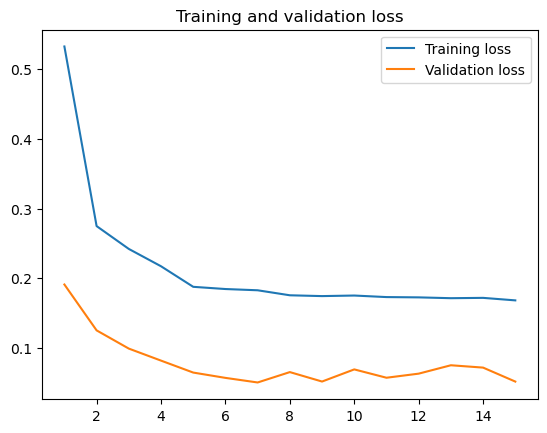

In [25]:
import matplotlib.pyplot as plt

X_train = data_X_train
Y_train = to_categorical(data_Y_train, num_classes=3)
X_test = data_X_test
Y_test = to_categorical(data_Y_test, num_classes=3)

model = Sequential()
model.add(Reshape((49, 1), input_shape=(49,)))
model.add(GRU(32, return_sequences=True))
model.add(GRU(32, return_sequences=False, activation='relu'))
# model.add(GRU(32, return_sequences=False))
model.add(Dense(3, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy',  metrics=['accuracy'])

history = model.fit(X_train, Y_train, epochs=15, batch_size=30, validation_split=0.1)

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, label='Training acc')
plt.plot(epochs, val_acc, label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

Видно, что к концу обучения точность на обучающей и валидацинной выборках повышается, а потери уменьшаются 

### Статистика после обучения

In [14]:
print(f'Для обучающей выборки:\n')
Y_pred = np.argmax(model.predict(data_X_train), axis=-1)
Y_train_flat = np.squeeze(np.asarray(data_Y_train))
Y_pred_train_flat = Y_pred.flatten()
print(classification_report(Y_train_flat, Y_pred_train_flat))
print()
print(f'Для тестовой выборки:\n')
Y_pred = np.argmax(model.predict(data_X_test), axis=-1)
Y_test_flat = np.squeeze(np.asarray(data_Y_test))
Y_pred_test_flat = Y_pred.flatten()
print(classification_report(Y_test_flat, Y_pred_test_flat))

Для обучающей выборки:

36/36 [==============================] - 5s 36ms/step
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       977
           1       0.83      0.87      0.85       126
           2       0.52      0.33      0.40        49

    accuracy                           0.95      1152
   macro avg       0.78      0.73      0.75      1152
weighted avg       0.94      0.95      0.95      1152


Для тестовой выборки:

9/9 [==============================] - 0s 34ms/step
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       240
           1       0.74      0.76      0.75        34
           2       0.71      0.36      0.48        14

    accuracy                           0.94       288
   macro avg       0.81      0.71      0.74       288
weighted avg       0.93      0.94      0.93       288



# GRU на преобразованном наборе

Epoch 1/15
35/35 [==============================] - 11s 120ms/step - loss: 0.8725 - accuracy: 0.7529 - val_loss: 0.4426 - val_accuracy: 0.8879
Epoch 2/15
35/35 [==============================] - 3s 81ms/step - loss: 0.4877 - accuracy: 0.8436 - val_loss: 0.4009 - val_accuracy: 0.8879
Epoch 3/15
35/35 [==============================] - 3s 81ms/step - loss: 0.4821 - accuracy: 0.8436 - val_loss: 0.3569 - val_accuracy: 0.8879
Epoch 4/15
35/35 [==============================] - 3s 83ms/step - loss: 0.4654 - accuracy: 0.8446 - val_loss: 0.3434 - val_accuracy: 0.8879
Epoch 5/15
35/35 [==============================] - 3s 81ms/step - loss: 0.4409 - accuracy: 0.8697 - val_loss: 0.3051 - val_accuracy: 0.9052
Epoch 6/15
35/35 [==============================] - 3s 82ms/step - loss: 0.4045 - accuracy: 0.8861 - val_loss: 0.2885 - val_accuracy: 0.9224
Epoch 7/15
35/35 [==============================] - 3s 81ms/step - loss: 0.3979 - accuracy: 0.8919 - val_loss: 0.2735 - val_accuracy: 0.9052
Epoch 8/15


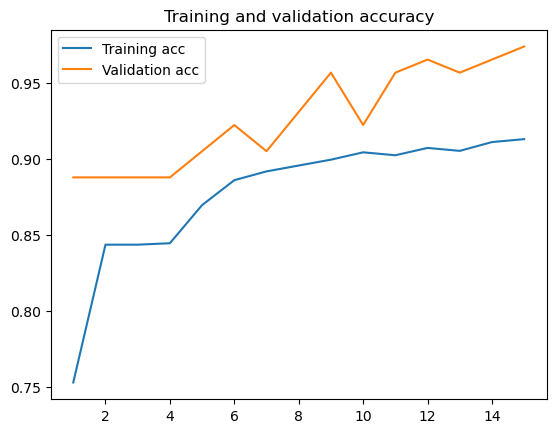

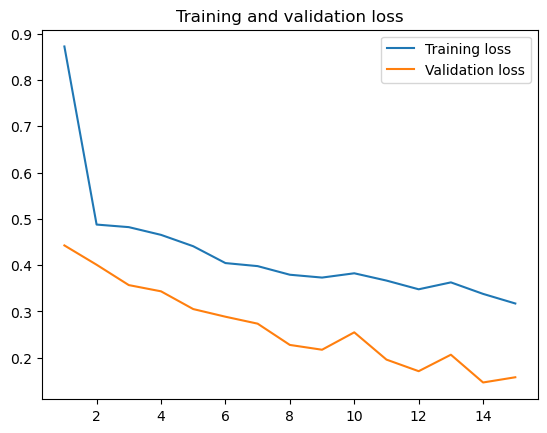

In [27]:
X_train = rescaled_data_X_train
Y_train = to_categorical(rescaled_data_Y_train, num_classes=3)
X_test = rescaled_data_X_test
Y_test = to_categorical(rescaled_data_Y_test, num_classes=3)

model = Sequential()
model.add(Reshape((49, 1), input_shape=(49,)))
model.add(GRU(32, return_sequences=True))
model.add(GRU(32, return_sequences=False, activation='relu'))
# model.add(GRU(32, return_sequences=False))
model.add(Dense(3, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy',  metrics=['accuracy'])

history = model.fit(X_train, Y_train, epochs=15, batch_size=30, validation_split=0.1)

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, label='Training acc')
plt.plot(epochs, val_acc, label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

### Статистика после обучения

In [16]:
print(f'Для обучающей выборки:\n')
Y_pred = np.argmax(model.predict(rescaled_data_X_train), axis=-1)
Y_train_flat = np.squeeze(np.asarray(rescaled_data_Y_train))
Y_pred_train_flat = Y_pred.flatten()
print(classification_report(Y_train_flat, Y_pred_train_flat))
print()
print(f'Для тестовой выборки:\n')
Y_pred = np.argmax(model.predict(rescaled_data_X_test), axis=-1)
Y_test_flat = np.squeeze(np.asarray(rescaled_data_Y_test))
Y_pred_test_flat = Y_pred.flatten()
print(classification_report(Y_test_flat, Y_pred_test_flat))

Для обучающей выборки:

36/36 [==============================] - 3s 34ms/step
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       977
           1       0.83      0.79      0.81       126
           2       0.00      0.00      0.00        49

    accuracy                           0.93      1152
   macro avg       0.59      0.60      0.59      1152
weighted avg       0.89      0.93      0.91      1152


Для тестовой выборки:

9/9 [==============================] - 0s 35ms/step
              precision    recall  f1-score   support

           0       0.93      0.99      0.96       240
           1       0.65      0.59      0.62        34
           2       0.00      0.00      0.00        14

    accuracy                           0.90       288
   macro avg       0.52      0.53      0.52       288
weighted avg       0.85      0.90      0.87       288



# Реализация градиентного бустинга

In [17]:
params_gbr = {
    'learning_rate': [0.01, 0.1, 1],
    'n_estimators': [50, 100, 200],
    'max_depth': [1, 2, 3, 4, 5]
}

In [18]:
gradboost_model = GradientBoostingClassifier()
grid_search = GridSearchCV(gradboost_model,
                           params_gbr,
                           n_jobs=-1,
                           cv=2)
grid_search.fit(data_X_train, data_Y_train)
best_gbr = grid_search.best_params_
print(f'Лучшие гиперпараметры для исходного набора преобразованных данных:', best_gbr, '\n')

gbr_model = GradientBoostingClassifier(**best_gbr)
gbr_model.fit(data_X_train, data_Y_train)
clf_train = gbr_model.predict(data_X_train)
print(classification_report(data_Y_train, clf_train))

clf_test = gbr_model.predict(data_X_test)
print(classification_report(data_Y_test, clf_test))

Лучшие гиперпараметры для исходного набора преобразованных данных: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200} 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       977
           1       1.00      1.00      1.00       126
           2       1.00      0.94      0.97        49

    accuracy                           1.00      1152
   macro avg       1.00      0.98      0.99      1152
weighted avg       1.00      1.00      1.00      1152

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       240
           1       0.81      0.65      0.72        34
           2       0.83      0.36      0.50        14

    accuracy                           0.92       288
   macro avg       0.86      0.67      0.73       288
weighted avg       0.92      0.92      0.91       288



In [19]:
gradboost_model = GradientBoostingClassifier()
grid_search = GridSearchCV(gradboost_model,
                           params_gbr,
                           n_jobs=-1,
                           cv=2)
grid_search.fit(rescaled_data_X_train, rescaled_data_Y_train)
best_gbr = grid_search.best_params_
print(f'Лучшие гиперпараметры для исходного набора преобразованных данных:', best_gbr, '\n')

gbr_model = GradientBoostingClassifier(**best_gbr)
gbr_model.fit(rescaled_data_X_train, rescaled_data_Y_train)
clf_train = gbr_model.predict(rescaled_data_X_train)
print(classification_report(rescaled_data_Y_train, clf_train))

clf_test = gbr_model.predict(rescaled_data_X_test)
print(classification_report(rescaled_data_Y_test, clf_test))

Лучшие гиперпараметры для исходного набора преобразованных данных: {'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 100} 

              precision    recall  f1-score   support

           0       0.97      1.00      0.99       977
           1       0.97      0.90      0.94       126
           2       1.00      0.59      0.74        49

    accuracy                           0.97      1152
   macro avg       0.98      0.83      0.89      1152
weighted avg       0.97      0.97      0.97      1152

              precision    recall  f1-score   support

           0       0.92      1.00      0.96       240
           1       0.91      0.62      0.74        34
           2       0.80      0.29      0.42        14

    accuracy                           0.92       288
   macro avg       0.88      0.63      0.71       288
weighted avg       0.92      0.92      0.91       288

